- x1-x2, y1-y2 좌표 안나옴. 계산 필요. box -> 4개의 점만 나옴
- angle 기준 달라서 합성 적용시 미디어 파이프를 사용한 각도 이용하는것이 더 정확할 것 같음 
- 참고: https://namkeenman.wordpress.com/2015/12/21/opencv-determine-orientation-of-ellipserotatedrect-in-fitellipse/
- =====================================
- 네일 디자인 분할할 경우, 각 손톱의 박스 위치를 활용 사용에 용이

In [75]:
import cv2, sys, warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import glob as gb
import tqdm
import os

In [116]:
def test_0(path):
    son_mask = cv2.imread(path)
    img_box = son_mask.copy()

    edge = cv2.dilate(img_box, None)
    blur = cv2.GaussianBlur(edge, ksize = (3, 3), sigmaX = 0)
    edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
    contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    len(contours)

    rect = cv2.minAreaRect(contours[0])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_box, [box], 0, (0,255,0), 2) # 박스 그리기|
    # cv2.circle(image, (255, 255), 30, (255, 0, 0), 3)
    plt.imshow(img_box)
    print(box)
    print(f'angle: {rect[2]}')
    print((box[1][0]-box[0][0])/(box[1][1]-box[0][1]))

[[182 111]
 [213 102]
 [218 117]
 [186 126]]
angle: 74.05460357666016
-3.4444444444444446


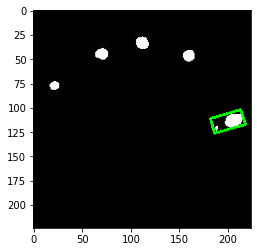

In [125]:
test_0('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_799.jpg')

[[176 125]
 [195 114]
 [200 122]
 [181 133]]
angle: 59.03623962402344
-1.7272727272727273


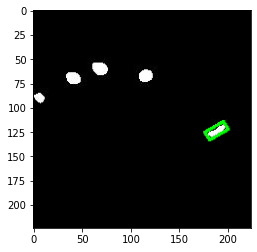

In [124]:
test_0('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_6.jpg')

[[470 844]
 [515 797]
 [587 865]
 [541 913]]
angle: 43.80651092529297
-0.9574468085106383


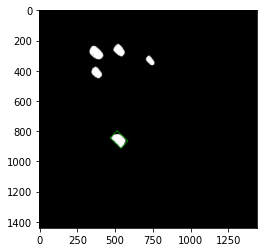

In [127]:

test_0('/Users/hyunjinkim/Desktop/final-4조/손_707.jpg')


In [12]:
Xs = [i[0] for i in box]
Ys = [i[1] for i in box]
Xs, Ys

([470, 515, 587, 541], [844, 797, 865, 913])

In [13]:
x1, x2, y1, y2 = min(Xs), max(Xs), min(Ys), max(Ys)
x1, x2, y1, y2

(470, 587, 797, 913)

In [14]:
B = []
for b in box:
        if b[0] == x1 or b[0] == x2:
         B.append(b)

In [15]:
B

[array([470, 844]), array([587, 865])]

In [16]:
(B[1][1]-B[0][1])/(B[1][0]-B[0][0])

0.1794871794871795

In [17]:
son_mask = cv2.imread('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_6.jpg')
img_box = son_mask.copy()
edge = cv2.dilate(img_box, None)
blur = cv2.GaussianBlur(edge, ksize = (3, 3), sigmaX = 0)
edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
len(contours)

5

In [18]:
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)


box

array([[176, 125],
       [195, 114],
       [200, 122],
       [181, 133]])

In [67]:
cv2.drawContours(img_box, [box], 0, (0,255,0), 2) # 박스 그리기|

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [19]:
Xs = [i[0] for i in box]
Ys = [i[1] for i in box]
print(Xs, Ys)
x1, x2, y1, y2 = min(Xs), max(Xs), min(Ys), max(Ys)
print(x1, x2, y1, y2)

[176, 195, 200, 181] [125, 114, 122, 133]
176 200 114 133


In [20]:
B = []
for b in box:
        if b[0] == x1 or b[0] == x2:
         B.append(b)
B 

[array([176, 125]), array([200, 122])]

In [21]:
(B[1][1]-B[0][1])/(B[1][0]-B[0][0])

-0.125

In [104]:
def rot_crop_box2(img_path):  
  global crop_img, img_box, angle_lst ,angle_lst2, cenetr_lst, side_x_lst, side_y_lst, box_lst,  B

  img = cv2.imread(img_path)
  
  mult = 1  # 자르는 이미지 비율, 1: 딱 맞게 자르기
  # img_box = cv2.cvtColor(img5.copy(), cv2.COLOR_GRAY2BGR)
  img_box = img.copy()
  
  edge = cv2.dilate(img_box, None)
  blur = cv2.GaussianBlur(edge, ksize = (3, 3), sigmaX = 0)
  edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
  contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)     

  crop_img, angle_lst = [], []     # 자른 이미지 담을 리스트 , 변환 전 좌표 
  angle_lst2, cenetr_lst = [], []  # 변환 후 좌표, 각 객체 중심 좌표
  side_x_lst, side_y_lst = [], []  # x1-x2, y1-y2
  box_lst = []
  for i, cnt in enumerate(contours):
      rect = cv2.minAreaRect(cnt)
      box = cv2.boxPoints(rect)
      box = np.int0(box)
      box_lst.append(box)
      cv2.drawContours(img_box, [box], 0, (0,255,0), 2) # 박스 그리기|

      W = rect[1][0]
      H = rect[1][1]

      Xs = [i[0] for i in box]
      Ys = [i[1] for i in box]
      x1, x2, y1, y2 = min(Xs), max(Xs), min(Ys), max(Ys)
      
    #   side_x, side_y= (x1, x2), (y1, y2)
    #   side_x_lst.append(side_x), side_y_lst.append(side_y)

      # B = [b for b in box if b[0] == x1 or b[0] == x2]
      # slope = (B[1][1]-B[0][1])/(B[1][0]-B[0][0]) # 기울기 
      # slope = (box[1][0]-box[0][0])/(box[1][1]-box[0][1])
      
      slope = (B[1][1]-B[0][1])/(B[1][0]-B[0][0]) # 기울기 (2번째 위치 - 3번째 위치)
      
       
      rotated = True
      angle = rect[2]
      angle_lst.append(angle)

      if angle < -45:
          angle+=90
          rotated = False
    #   elif 60<(90-angle) and (90-angle)<90: 
    #       angle+=90
    #       rotated = False
        
      angle_lst2.append(angle)
            

      center = (int((x1+x2)/2), int((y1+y2)/2))
      size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
      cenetr_lst.append(center)
      # cv2.circle(img_box, center, 10, (0,255,0), -1) # 가운데 점 그리기
      
      if slope >= 0:
        M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle-90, 1.0)
        # print(f'slope >= 0 index num :{i}')
      else:
        rotated = False
        M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)
        print(f'slope < 0 index num :{i}')
      
      cropped = cv2.getRectSubPix(img_box, size, center)    
      cropped = cv2.warpAffine(cropped, M, size)

      croppedW = W if not rotated else H 
      croppedH = H if not rotated else W

      croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))
      crop_img.append(croppedRotated)

      plt.subplot(1, len(contours), i+1)
      plt.title(f'index: {i}')
      plt.imshow(croppedRotated)
      # plt.show()

#   plt.imshow(img_box)
  plt.show()

In [129]:
# 결과 확인용
def check_result(path):
    path = path
    # img = cv2.imread(path)
    rot_crop_box2(path), len(crop_img)
    print(box_lst)
    print(f'- 변환 전 각도: {angle_lst} \n- 변환 후 각도: {angle_lst2} \n- 각 이미지 중심 좌표: {cenetr_lst}')
    rot_crop_box3(path)
    print(f'- 변환 전 각도: {angle_lst} \n- 변환 후 각도: {angle_lst2} \n- 각 이미지 중심 좌표: {cenetr_lst}')
    plt.imshow(img_box)

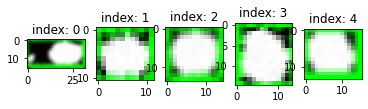

[array([[182, 111],
       [213, 102],
       [218, 117],
       [186, 126]]), array([[14, 73],
       [26, 69],
       [29, 81],
       [16, 84]]), array([[150,  41],
       [165,  37],
       [168,  51],
       [154,  55]]), array([[60, 49],
       [64, 35],
       [79, 39],
       [76, 53]]), array([[104,  26],
       [120,  26],
       [120,  40],
       [104,  40]])]
[array([59, 52]), array([78, 52]), array([78, 68]), array([59, 68])]
- 변환 전 각도: [74.05460357666016, 75.96376037597656, 75.96376037597656, 14.03624439239502, 90.0] 
- 변환 후 각도: [74.05460357666016, 75.96376037597656, 75.96376037597656, 14.03624439239502, 90.0] 
- 각 이미지 중심 좌표: [(200, 114), (21, 76), (159, 46), (69, 44), (112, 33)]


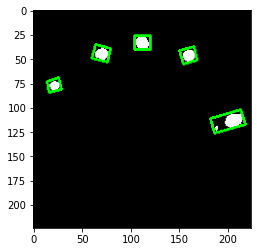

In [105]:
check_result('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_799.jpg')

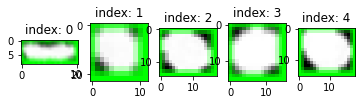

[array([[176, 125],
       [195, 114],
       [200, 122],
       [181, 133]]), array([[ 0, 84],
       [12, 84],
       [12, 96],
       [ 0, 96]]), array([[32, 62],
       [50, 62],
       [50, 77],
       [32, 77]]), array([[107,  59],
       [123,  59],
       [123,  75],
       [107,  75]]), array([[59, 52],
       [78, 52],
       [78, 68],
       [59, 68]])]
[array([59, 52]), array([78, 52]), array([78, 68]), array([59, 68])]
- 변환 전 각도: [59.03623962402344, 90.0, 90.0, 90.0, 90.0] 
- 변환 후 각도: [59.03623962402344, 90.0, 90.0, 90.0, 90.0] 
- 각 이미지 중심 좌표: [(188, 123), (6, 90), (41, 69), (115, 67), (68, 60)]


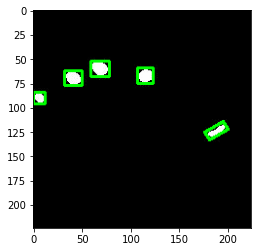

In [106]:
check_result('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_6.jpg')

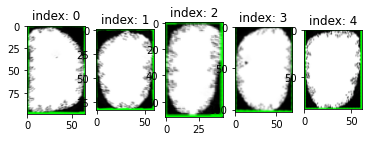

[array([[470, 844],
       [515, 797],
       [587, 865],
       [541, 913]]), array([[328, 403],
       [373, 362],
       [430, 424],
       [385, 465]]), array([[694, 325],
       [725, 293],
       [776, 344],
       [745, 376]]), array([[314, 278],
       [359, 223],
       [440, 289],
       [395, 343]]), array([[478, 258],
       [522, 214],
       [583, 275],
       [539, 319]])]
[array([59, 52]), array([78, 52]), array([78, 68]), array([59, 68])]
- 변환 전 각도: [43.80651092529297, 47.48955535888672, 45.0, 38.990997314453125, 45.0] 
- 변환 후 각도: [43.80651092529297, 47.48955535888672, 45.0, 38.990997314453125, 45.0] 
- 각 이미지 중심 좌표: [(528, 855), (379, 413), (735, 334), (377, 283), (530, 266)]


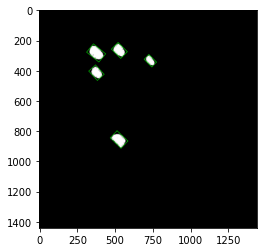

In [107]:
check_result('/Users/hyunjinkim/Desktop/final-4조/손_707.jpg')

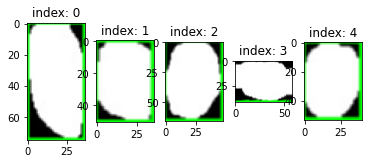

[array([[587, 429],
       [624, 429],
       [624, 504],
       [587, 504]]), array([[127, 329],
       [163, 329],
       [163, 380],
       [127, 380]]), array([[227, 195],
       [275, 195],
       [275, 261],
       [227, 261]]), array([[402, 234],
       [407, 175],
       [450, 180],
       [444, 238]]), array([[302, 153],
       [342, 153],
       [342, 207],
       [302, 207]])]
[array([59, 52]), array([78, 52]), array([78, 68]), array([59, 68])]
- 변환 전 각도: [90.0, 90.0, 90.0, 5.710592269897461, 90.0] 
- 변환 후 각도: [90.0, 90.0, 90.0, 5.710592269897461, 90.0] 
- 각 이미지 중심 좌표: [(605, 466), (145, 354), (251, 228), (426, 206), (322, 180)]


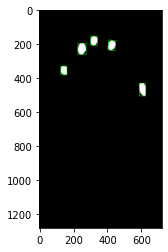

In [103]:
check_result('/Users/hyunjinkim/Desktop/final-4조/test/son_mask.jpeg')

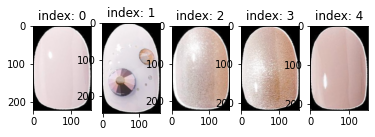

[array([[743, 452],
       [888, 410],
       [949, 623],
       [804, 665]]), array([[ 27, 450],
       [174, 389],
       [269, 618],
       [122, 679]]), array([[381, 441],
       [528, 392],
       [599, 605],
       [452, 654]]), array([[569, 520],
       [622, 306],
       [769, 343],
       [716, 557]]), array([[218, 511],
       [266, 299],
       [412, 332],
       [363, 544]])]
[array([218, 511]), array([412, 332])]
- 변환 전 각도: [74.05460357666016, 67.38013458251953, 71.56504821777344, 14.03624439239502, 12.994616508483887] 
- 변환 후 각도: [74.05460357666016, 67.38013458251953, 71.56504821777344, 14.03624439239502, 12.994616508483887] 
- 각 이미지 중심 좌표: [(846, 537), (148, 534), (490, 523), (669, 431), (315, 421)]
- 각 이미지 x1-x2 좌표: []
- 각 이미지 y1-y2 좌표: []


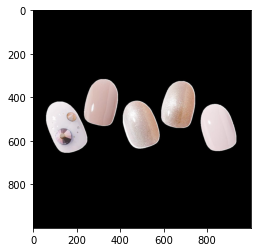

In [36]:

 check_result('/Users/hyunjinkim/Desktop/final-4조/네일디자인_모델_데이터/합성_최종_1/[01.20 - 02.18] 물병자리 윈터 우라노스.jpg')

In [6]:
import cv2

hand_0 = cv2.imread('/Users/hyunjinkim/Desktop/final-4조/손_0.jpg')
hand_mask_0 = cv2.imread('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_0.jpg')
hand_0.shape, hand_mask_0.shape

((1920, 1080, 3), (224, 224, 3))

In [15]:
# hand_mask_0.reshape((1920, 1080, 3))
hand_mask_0 = cv2.resize(hand_mask_0, ( 1080, 1920))

In [16]:
hand_0.shape, hand_mask_0.shape

((1920, 1080, 3), (1920, 1080, 3))

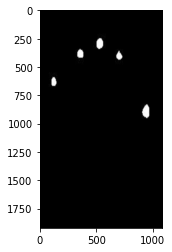

In [19]:
import matplotlib.pyplot as plt

plt.imshow(hand_mask_0)
plt.show()

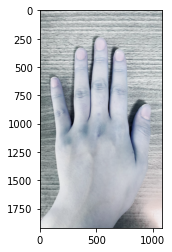

In [20]:
plt.imshow(hand_0)

In [253]:
def rot_crop_box3(img_path):  
  global crop_img, img_box, angle_lst ,angle_lst2, cenetr_lst, side_x_lst, side_y_lst, box_lst

  img = cv2.imread(img_path)
  
  mult = 1  # 자르는 이미지 비율, 1: 딱 맞게 자르기
  # img_box = cv2.cvtColor(img5.copy(), cv2.COLOR_GRAY2BGR)
  img_box = img.copy()
  
  edge = cv2.dilate(img_box, None)
  blur = cv2.GaussianBlur(edge, ksize = (3, 3), sigmaX = 0)
  edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
  contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)     

  crop_img, angle_lst = [], []     # 자른 이미지 담을 리스트 , 변환 전 좌표 
  angle_lst2, cenetr_lst = [], []  # 변환 후 좌표, 각 객체 중심 좌표
  side_x_lst, side_y_lst = [], []  # x1-x2, y1-y2
  box_lst = []
  for i, cnt in enumerate(contours):
      rect = cv2.minAreaRect(cnt)
      box = cv2.boxPoints(rect)
      box = np.int0(box)
      box_lst.append(box)
      cv2.drawContours(img_box, [box], 0, (0,255,0), 2) # 박스 그리기|

      W, H = rect[1][0], rect[1][1]

      Xs = [i[0] for i in box]
      Ys = [i[1] for i in box]
      x1, x2, y1, y2 = min(Xs), max(Xs), min(Ys), max(Ys)

      angle = rect[2]
      angle_lst.append(angle)
      
      if angle>0:
            if W < H:
                  angle = (angle)
                  print(f' W < H // index num :{i}')
            else:
                  angle = -(90-angle)
      # elif angle <0:
      #       if W < H:
      #             angle = (-90-angle)
                  
        
      angle_lst2.append(angle)
            

      center = (int((x1+x2)/2), int((y1+y2)/2))
      size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
      cenetr_lst.append(center)
      cv2.circle(img_box, center, 1, (0,255,0), -1) # 가운데 점 그리기

      M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)
      
      cropped = cv2.getRectSubPix(img_box, size, center)    
      cropped = cv2.warpAffine(cropped, M, size)
      
      croppedW = W if W < H else H
      croppedH = H if W < H else W

      croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW * mult), int(croppedH * mult)), (size[0]/2, size[1]/2))
      crop_img.append(croppedRotated)

      plt.subplot(1, len(contours), i+1)
      plt.title(f'index: {i}')
      plt.imshow(croppedRotated)
      # plt.show()

#   plt.imshow(img_box)
  plt.show()

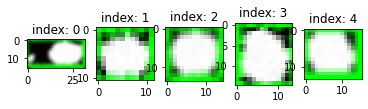

[array([[182, 111],
       [213, 102],
       [218, 117],
       [186, 126]]), array([[14, 73],
       [26, 69],
       [29, 81],
       [16, 84]]), array([[150,  41],
       [165,  37],
       [168,  51],
       [154,  55]]), array([[60, 49],
       [64, 35],
       [79, 39],
       [76, 53]]), array([[104,  26],
       [120,  26],
       [120,  40],
       [104,  40]])]
- 변환 전 각도: [74.05460357666016, 75.96376037597656, 75.96376037597656, 14.03624439239502, 90.0] 
- 변환 후 각도: [74.05460357666016, 75.96376037597656, 75.96376037597656, 14.03624439239502, 90.0] 
- 각 이미지 중심 좌표: [(200, 114), (21, 76), (159, 46), (69, 44), (112, 33)]
 W < H // index num :0
 W < H // index num :1
 W < H // index num :2
 W < H // index num :4


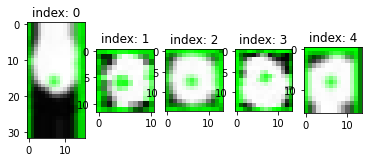

- 변환 전 각도: [74.05460357666016, 75.96376037597656, 75.96376037597656, 14.03624439239502, 90.0] 
- 변환 후 각도: [74.05460357666016, 75.96376037597656, 75.96376037597656, -75.96375560760498, 90.0] 
- 각 이미지 중심 좌표: [(200, 114), (21, 76), (159, 46), (69, 44), (112, 33)]


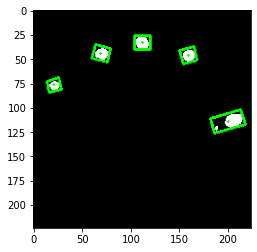

In [254]:
check_result('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_799.jpg')

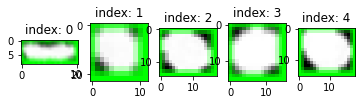

[array([[176, 125],
       [195, 114],
       [200, 122],
       [181, 133]]), array([[ 0, 84],
       [12, 84],
       [12, 96],
       [ 0, 96]]), array([[32, 62],
       [50, 62],
       [50, 77],
       [32, 77]]), array([[107,  59],
       [123,  59],
       [123,  75],
       [107,  75]]), array([[59, 52],
       [78, 52],
       [78, 68],
       [59, 68]])]
- 변환 전 각도: [59.03623962402344, 90.0, 90.0, 90.0, 90.0] 
- 변환 후 각도: [59.03623962402344, 90.0, 90.0, 90.0, 90.0] 
- 각 이미지 중심 좌표: [(188, 123), (6, 90), (41, 69), (115, 67), (68, 60)]
 W < H // index num :0
 W < H // index num :2
 W < H // index num :4


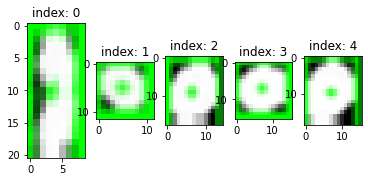

- 변환 전 각도: [59.03623962402344, 90.0, 90.0, 90.0, 90.0] 
- 변환 후 각도: [59.03623962402344, -0.0, 90.0, -0.0, 90.0] 
- 각 이미지 중심 좌표: [(188, 123), (6, 90), (41, 69), (115, 67), (68, 60)]


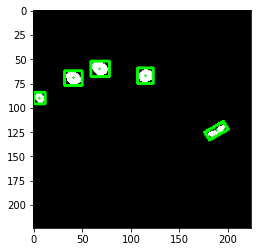

In [255]:
check_result('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_6.jpg')

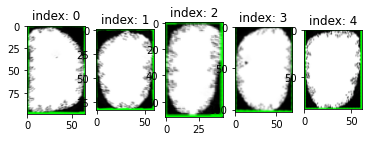

[array([[470, 844],
       [515, 797],
       [587, 865],
       [541, 913]]), array([[328, 403],
       [373, 362],
       [430, 424],
       [385, 465]]), array([[694, 325],
       [725, 293],
       [776, 344],
       [745, 376]]), array([[314, 278],
       [359, 223],
       [440, 289],
       [395, 343]]), array([[478, 258],
       [522, 214],
       [583, 275],
       [539, 319]])]
- 변환 전 각도: [43.80651092529297, 47.48955535888672, 45.0, 38.990997314453125, 45.0] 
- 변환 후 각도: [43.80651092529297, 47.48955535888672, 45.0, 38.990997314453125, 45.0] 
- 각 이미지 중심 좌표: [(528, 855), (379, 413), (735, 334), (377, 283), (530, 266)]


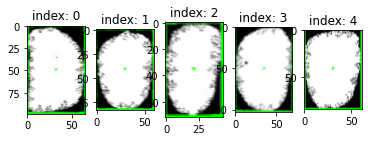

- 변환 전 각도: [43.80651092529297, 47.48955535888672, 45.0, 38.990997314453125, 45.0] 
- 변환 후 각도: [-46.19348907470703, -42.51044464111328, -45.0, -51.009002685546875, -45.0] 
- 각 이미지 중심 좌표: [(528, 855), (379, 413), (735, 334), (377, 283), (530, 266)]


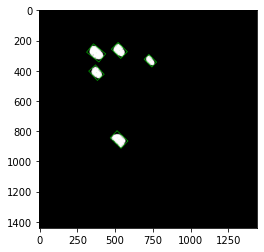

In [256]:
check_result('/Users/hyunjinkim/Desktop/final-4조/손_707.jpg')

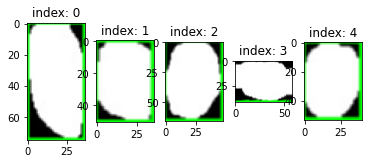

[array([[587, 429],
       [624, 429],
       [624, 504],
       [587, 504]]), array([[127, 329],
       [163, 329],
       [163, 380],
       [127, 380]]), array([[227, 195],
       [275, 195],
       [275, 261],
       [227, 261]]), array([[402, 234],
       [407, 175],
       [450, 180],
       [444, 238]]), array([[302, 153],
       [342, 153],
       [342, 207],
       [302, 207]])]
- 변환 전 각도: [90.0, 90.0, 90.0, 5.710592269897461, 90.0] 
- 변환 후 각도: [90.0, 90.0, 90.0, 5.710592269897461, 90.0] 
- 각 이미지 중심 좌표: [(605, 466), (145, 354), (251, 228), (426, 206), (322, 180)]
 W < H // index num :3


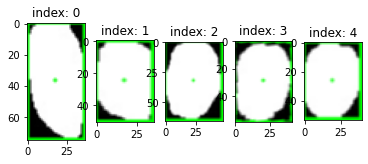

- 변환 전 각도: [90.0, 90.0, 90.0, 5.710592269897461, 90.0] 
- 변환 후 각도: [-0.0, -0.0, -0.0, 5.710592269897461, -0.0] 
- 각 이미지 중심 좌표: [(605, 466), (145, 354), (251, 228), (426, 206), (322, 180)]


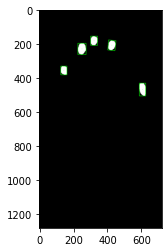

In [257]:
check_result('/Users/hyunjinkim/Desktop/final-4조/test/son_mask.jpeg')

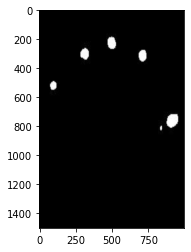

In [261]:
img = cv2.imread('/Users/hyunjinkim/Desktop/final-4조/모델마스크_손_799.jpg')
hand_mask_0 = cv2.resize(img, (1000, 1500))
plt.imshow(hand_mask_0)

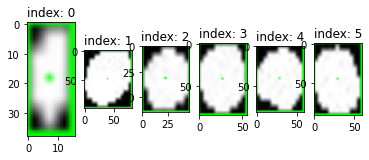

In [262]:
mult = 1  # 자르는 이미지 비율, 1: 딱 맞게 자르기
# img_box = cv2.cvtColor(img5.copy(), cv2.COLOR_GRAY2BGR)
img_box = hand_mask_0.copy()

edge = cv2.dilate(img_box, None)
blur = cv2.GaussianBlur(edge, ksize = (3, 3), sigmaX = 0)
edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)     

crop_img, angle_lst = [], []     # 자른 이미지 담을 리스트 , 변환 전 좌표 
angle_lst2, cenetr_lst = [], []  # 변환 후 좌표, 각 객체 중심 좌표
side_x_lst, side_y_lst = [], []  # x1-x2, y1-y2
box_lst = []
for i, cnt in enumerate(contours):
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    box_lst.append(box)
    cv2.drawContours(img_box, [box], 0, (0,255,0), 2) # 박스 그리기|

    W, H = rect[1][0], rect[1][1]

    Xs = [i[0] for i in box]
    Ys = [i[1] for i in box]
    x1, x2, y1, y2 = min(Xs), max(Xs), min(Ys), max(Ys)

    angle = rect[2]
    angle_lst.append(angle)
    
    if angle>0:
        if W < H:
                angle = (angle)
                print(f' W < H // index num :{i}')
        else:
                angle = -(90-angle)
    # elif angle <0:
    #       if W < H:
    #             angle = (-90-angle)
                
    
    angle_lst2.append(angle)
        

    center = (int((x1+x2)/2), int((y1+y2)/2))
    size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
    cenetr_lst.append(center)
    cv2.circle(img_box, center, 1, (0,255,0), -1) # 가운데 점 그리기

    M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)
    
    cropped = cv2.getRectSubPix(img_box, size, center)    
    cropped = cv2.warpAffine(cropped, M, size)
    
    croppedW = W if W < H else H
    croppedH = H if W < H else W

    croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW * mult), int(croppedH * mult)), (size[0]/2, size[1]/2))
    crop_img.append(croppedRotated)

    plt.subplot(1, len(contours), i+1)
    plt.title(f'index: {i}')
    plt.imshow(croppedRotated)
    # plt.show()

#   plt.imshow(img_box)
plt.show()

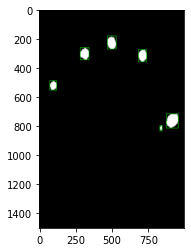

In [263]:
plt.imshow(img_box)